In [1]:
import pandas as pd
import sqlite3
from datetime import datetime
import os
import sys
from collections import OrderedDict
import numpy as np

In [2]:
MET_res = "/media/cap/extra_work/CERISE/MET_results"
all_results = os.listdir(MET_res)
results = OrderedDict()
for f in all_results:
    
    if f.endswith("_cts.txt"):
        read_date = f.split("_")[3]
        results[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    elif f.endswith(".nc"):
        ncfile = f
    

In [3]:
len(results.keys())


30

#### PODY: is the probabily of detection. It  is the hit rate (HR)
####  POFS is the probabiliy of false detection. It is the false alarm rate (FAR)
#### ACC is the  accuracy

In [4]:
#PODY: is the probabily of detection. IT is the false alarm rate
# 
pod_cols = [col for col in results["20160510"].columns if "POD" in col]
pof_cols = [col for col in results["20160510"].columns if "POF" in col]
acc_cols = [col for col in results["20160510"].columns if "ACC" in col]
fss_cols = [col for col in results["20160510"].columns if "FSS" in col]

In [5]:
pod_cols

['PODY',
 'PODY_NCL',
 'PODY_NCU',
 'PODY_BCL',
 'PODY_BCU',
 'PODN',
 'PODN_NCL',
 'PODN_NCU',
 'PODN_BCL',
 'PODN_BCU']

In [6]:
pof_cols

['POFD', 'POFD_NCL', 'POFD_NCU', 'POFD_BCL', 'POFD_BCU']

In [7]:
acc_cols

['ACC', 'ACC_NCL', 'ACC_NCU', 'ACC_BCL', 'ACC_BCU']

In [8]:
fss_cols

[]

In [9]:
results["20160510"][['FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',"PODY","VX_MASK"]]

,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END,OBS_LEAD,OBS_VALID_BEG,OBS_VALID_END,PODY,VX_MASK
0,0,20160510_000000,20160510_000000,0,19700101_000000,19700101_000000,0.24012,FULL


In [10]:
results["20160501"]["VX_MASK"]

0    FULL
Name: VX_MASK, dtype: object

### Collect the values for all dates and take the PODY


In [12]:
REGION = "FULL"

hit_dict=OrderedDict()

for label in ["datetime","hit_rate"]:
    hit_dict[label] = []
for key_date in results.keys():
    df_sel = results[key_date][results[key_date]["VX_MASK"]  == REGION]
    hit_dict["hit_rate"].append(df_sel["PODY"].values[0])
    hit_dict["datetime"].append(datetime.strptime(df_sel["FCST_VALID_BEG"].values[0],"%Y%m%d_%H%M%S"))

### find fraction skill score

In [13]:
fss_files=OrderedDict()
for f in all_results:
    
    if f.endswith("_nbrcnt.txt"):
        read_date = f.split("_")[3]
        fss_files[read_date]  = pd.read_csv(os.path.join(MET_res,f),sep=r'\s+')
    
    

In [14]:
fss_files.keys()

odict_keys(['20160518', '20160527', '20160508', '20160504', '20160512', '20160526', '20160516', '20160509', '20160517', '20160503', '20160501', '20160515', '20160519', '20160511', '20160525', '20160506', '20160524', '20160529', '20160531', '20160514', '20160502', '20160522', '20160528', '20160510', '20160523', '20160513', '20160507', '20160520', '20160521', '20160530'])

In [15]:
# other columns
fss_files["20160501"].columns

Index(['VERSION', 'MODEL', 'DESC', 'FCST_LEAD', 'FCST_VALID_BEG',
       'FCST_VALID_END', 'OBS_LEAD', 'OBS_VALID_BEG', 'OBS_VALID_END',
       'FCST_VAR', 'FCST_UNITS', 'FCST_LEV', 'OBS_VAR', 'OBS_UNITS', 'OBS_LEV',
       'OBTYPE', 'VX_MASK', 'INTERP_MTHD', 'INTERP_PNTS', 'FCST_THRESH',
       'OBS_THRESH', 'COV_THRESH', 'ALPHA', 'LINE_TYPE', 'TOTAL', 'FBS',
       'FBS_BCL', 'FBS_BCU', 'FSS', 'FSS_BCL', 'FSS_BCU', 'AFSS', 'AFSS_BCL',
       'AFSS_BCU', 'UFSS', 'UFSS_BCL', 'UFSS_BCU', 'F_RATE', 'F_RATE_BCL',
       'F_RATE_BCU', 'O_RATE', 'O_RATE_BCL', 'O_RATE_BCU'],
      dtype='object')

In [16]:
fss_files["20160510"][["VX_MASK","INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

,VX_MASK,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,FULL,1,0.37866,0,20160510_000000,20160510_000000
1,FULL,9,0.39101,0,20160510_000000,20160510_000000
2,FULL,25,0.39012,0,20160510_000000,20160510_000000
3,FULL,49,0.38800,0,20160510_000000,20160510_000000


In [17]:
fss_cols = [col for col in fss_files["20160501"].columns if "FSS" in col]
fss_cols

['FSS',
 'FSS_BCL',
 'FSS_BCU',
 'AFSS',
 'AFSS_BCL',
 'AFSS_BCU',
 'UFSS',
 'UFSS_BCL',
 'UFSS_BCU']

In [18]:
fss_files["20160510"][["FSS"]]

,FSS
0,0.37866
1,0.39101
2,0.39012
3,0.38800


### Plot the FSS for a given domain

In [19]:
date_sel = "20160510"
get_fss_all = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "FULL"]
#get_fss_gr = fss_files[date_sel][fss_files[date_sel]["VX_MASK"] == "GREENLAND_WEST_SECTION"]

fss_all = get_fss_all[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]

In [20]:
fss_all

,INTERP_PNTS,FSS,FCST_LEAD,FCST_VALID_BEG,FCST_VALID_END
0,1,0.37866,0,20160510_000000,20160510_000000
1,9,0.39101,0,20160510_000000,20160510_000000
2,25,0.39012,0,20160510_000000,20160510_000000
3,49,0.38800,0,20160510_000000,20160510_000000


In [21]:
#fss_gr = get_fss_gr[["INTERP_PNTS","FSS","FCST_LEAD","FCST_VALID_BEG","FCST_VALID_END"]]
#fss_gr

In [22]:
for _,r in fss_all.iterrows():
    print(r["FSS"])

0.37866
0.39101
0.39012
0.388


In [23]:
df_fss_full = pd.DataFrame(columns=["date","points","fss"])
#df_fss_gr = pd.DataFrame(columns=["date","points","fss"])


In [24]:
for key in fss_files:
    data = fss_files[key][fss_files[key]["VX_MASK"] == "FULL"]
    for _,r in data.iterrows():
        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
        df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)

#for key in fss_files:
#    data = fss_files[key][fss_files[key]["VX_MASK"] == "GREENLAND_WEST_SECTION"]
#    for _,r in data.iterrows():
#        conv_date = datetime.strptime(r["FCST_VALID_BEG"],"%Y%m%d_%H%M%S")
#        data_row = pd.DataFrame({"date":[conv_date],"points":[r["INTERP_PNTS"]],"fss":[r["FSS"]]},columns=["date","points","fss"])
#        df_fss_gr=pd.concat([df_fss_gr,data_row],ignore_index=True)

/tmp/ipykernel_560032/2741433425.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_fss_full=pd.concat([df_fss_full,data_row],ignore_index=True)


In [25]:
df_fss_full.dtypes

date      datetime64[ns]
points            object
fss              float64
dtype: object

In [26]:
df_fss_full["day"] = df_fss_full["date"].dt.strftime('%Y-%m-%d')

In [27]:
df_fss_full

,date,points,fss,day
0,2016-05-18,1,0.34736,2016-05-18
1,2016-05-18,9,0.35482,2016-05-18
2,2016-05-18,25,0.35045,2016-05-18
3,2016-05-18,49,0.34522,2016-05-18
4,2016-05-27,1,0.37401,2016-05-27
...,...,...,...,...
115,2016-05-21,49,0.39185,2016-05-21
116,2016-05-30,1,0.38466,2016-05-30
117,2016-05-30,9,0.40098,2016-05-30
118,2016-05-30,25,0.39778,2016-05-30


In [28]:
pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')


In [32]:
from matplotlib.colors import LinearSegmentedColormap


# Create custom colormap (red to green)
colors = ['red', 'green']
n_bins = 10  # Number of color gradients
cmap = LinearSegmentedColormap.from_list("custom", colors, N=n_bins)

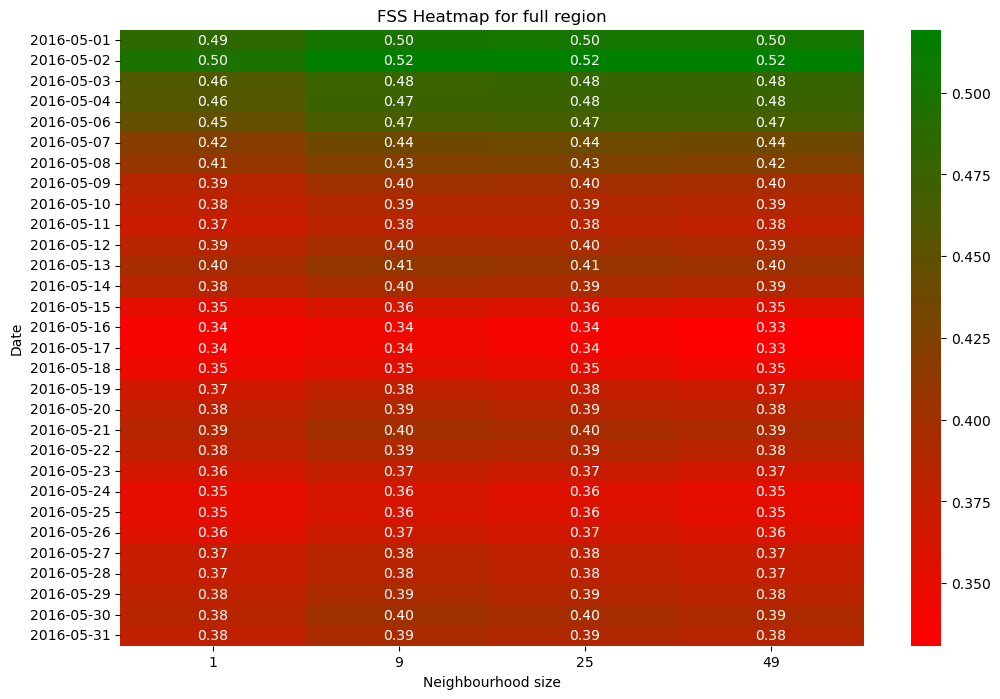

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
#cmap = "viridis"
#cmap = "coolwarm"

pivot_df = df_fss_full.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title(f'FSS Heatmap for full region')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()

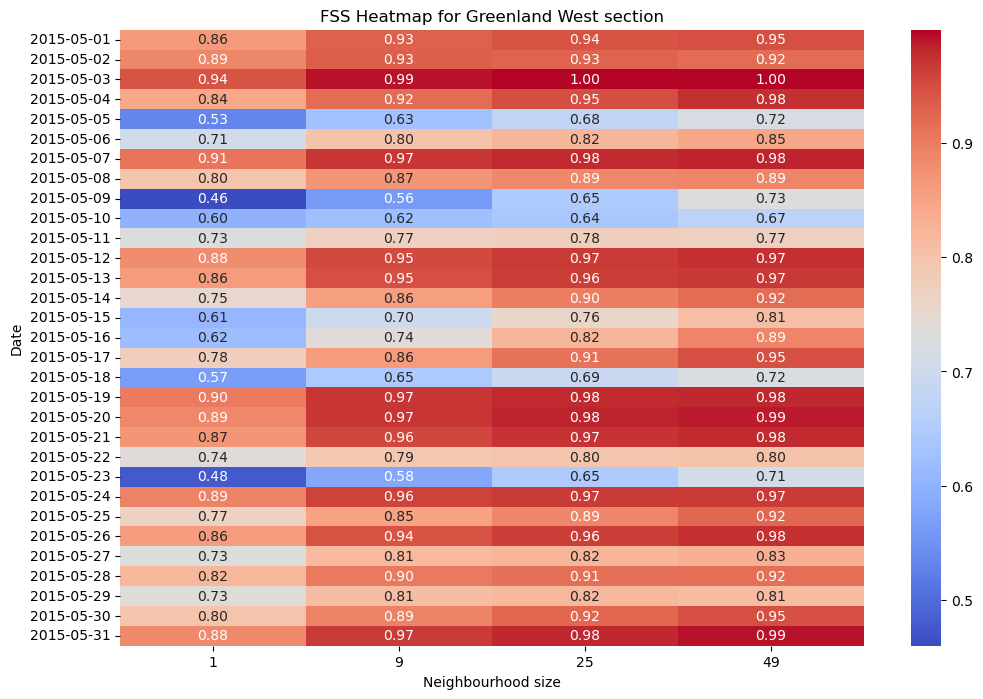

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
df_fss_gr["day"] = df_fss_gr["date"].dt.strftime('%Y-%m-%d')
pivot_df = df_fss_gr.pivot(index='day', columns='points', values='fss')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap=cmap)

plt.title('FSS Heatmap for Greenland West section')
plt.xlabel('Neighbourhood size')
plt.ylabel('Date')

plt.show()